## 5 - How many sets are typically played in a tennis match?

In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

time_files = glob('../data/raw/*/time_[0-9]*.parquet')

df_time = pd.concat([pd.read_parquet(file, columns=['match_id', 'period_1', 'period_2', 
                                                    'period_3', 'period_4', 'period_5']) for file in time_files])
df_time.sample(5)

,match_id,period_1,period_2,period_3,period_4,period_5
0,12060934,None,None,None,None,None
0,12080201,None,None,None,None,None
0,12156087,4185,1774,None,None,None
0,12077336,None,None,None,None,None
0,12097941,None,None,None,None,None


In [2]:
# Get the maximum non-null value in each period column
df_sets = df_time.groupby('match_id')[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].agg(lambda x: x.notna().any()).astype(int)
df_sets.sample(5)

,period_1,period_2,period_3,period_4,period_5
match_id,,,,,
12041792,1,1,0,0,0
12078287,1,1,0,0,0
12045901,1,1,0,0,0
12193464,1,1,0,0,0
12054559,1,1,0,0,0


In [3]:
# Sum periods (sets) played per match
sets_per_match = df_sets.sum(axis=1)
sets_per_match = sets_per_match[sets_per_match > 0]  # Excluding incomplete matches)
sets_per_match.sample(5)

match_id
12046858    2
12160432    2
12054402    3
12191147    2
12110885    3
dtype: int64

In [4]:
# Count the number of matches with each number of sets played
sets_count = sets_per_match.value_counts().sort_index()
print("\nNumber of Matches by Sets Played:")
print(sets_count)


Number of Matches by Sets Played:
1      17
2    7680
3    3392
Name: count, dtype: int64


In [5]:
average_sets = sets_per_match.mean()
print("\nAnalysis:")
print(f"\nAverage sets per match (excluding incomplete matches): {average_sets:.2f}")


Analysis:

Average sets per match (excluding incomplete matches): 2.30


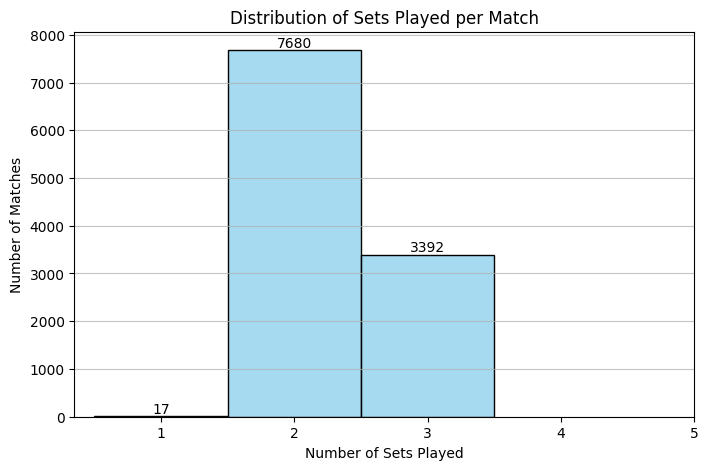

In [6]:
# Visualization
plt.figure(figsize=(8, 5))
ax = sns.histplot(sets_per_match, bins=range(1, 6), kde=False, color='skyblue', discrete=True)
plt.title('Distribution of Sets Played per Match')
plt.xlabel('Number of Sets Played')
plt.ylabel('Number of Matches')
plt.xticks(range(1, 6))
plt.grid(axis='y', alpha=0.75)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

plt.savefig('../data/output/figures/img5.png')
plt.show()